<a href="https://colab.research.google.com/github/mofuoku417/Multivariate-Time-Series-Forecasting-of-Crude-Palm-Oil-Price-Using-Machine-Learning-Techniques/blob/main/Holt_Winters_SES%2C_DES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install statsmodels==0.9.0rc1

  Using cached statsmodels-0.9.0rc1.tar.gz (12.6 MB)
  ERROR: Failed building wheel for statsmodels
  Running setup.py clean for statsmodels
Failed to build statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
    Running setup.py install for statsmodels ... error
  Rolling back uninstall of statsmodels
  Moving to /usr/local/lib/python3.7/dist-packages/statsmodels-0.10.2.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~tatsmodels-0.10.2.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/statsmodels/
   from /usr/local/lib/python3.7/dist-packages/~tatsmodels
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-7qjndl4j/statsmodels_3dda319454e74a4e8b68d89b013e4563/setup.py'"'"'; __file__='"'"'/tmp/pip-install-7qjndl4j/statsmodels_3dda319454e

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer

import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
import seaborn as sns
import os
import glob
import numpy as np
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
%matplotlib inline

In [20]:
df3 = pd.read_csv('/content/gdrive/MyDrive/raw_data/df3.csv')

In [21]:
df3.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer

import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [23]:
validation_split = 0.25
trainfrac = 0.75
df_train, df_test = train_test_split(df3, train_size=trainfrac, shuffle=False, stratify=None)

In [25]:
df_test

,Month,cpo_pri,cno_pri,sbo_pri,pno_pri
172,2016-06-01,459,569,535.83,1029.16
173,2016-07-01,474,591,533.27,993.18
174,2016-08-01,473,575,540.60,961.89
175,2016-09-01,476,578,540.44,936.96
176,2016-10-01,484,583,588.29,936.96
177,2016-11-01,478,575,600.55,957.01
178,2016-12-01,499,583,630.01,990.51
179,2017-01-01,534,606,632.18,1041.92
180,2017-02-01,511,609,602.35,1079.22
181,2017-03-01,514,626,614.71,1102.31


In [108]:
# Form dataset matrix
def create_dataset(df4, previous=1):
    dataX, dataY = [], []
    for i in range(len(df4)-previous-1):
        a = df4[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df4[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [109]:
scaler = MinMaxScaler(feature_range = (0,1))
df4 = scaler.fit_transform(df4)
df4

array([[0.07786527],
       [0.09711286],
       [0.111986  ],
       [0.12423447],
       [0.13035871],
       [0.12948381],
       [0.14173228],
       [0.14698163],
       [0.13648294],
       [0.14873141],
       [0.12948381],
       [0.12948381],
       [0.13735783],
       [0.14173228],
       [0.15660542],
       [0.14610674],
       [0.15398075],
       [0.16710411],
       [0.15223097],
       [0.13823272],
       [0.11986002],
       [0.10673666],
       [0.111986  ],
       [0.10673666],
       [0.1032371 ],
       [0.08661417],
       [0.10761155],
       [0.15485564],
       [0.14873141],
       [0.13385827],
       [0.14085739],
       [0.17497813],
       [0.22222222],
       [0.23972003],
       [0.22747157],
       [0.29833771],
       [0.33245844],
       [0.33420822],
       [0.41382327],
       [0.42432196],
       [0.36832896],
       [0.3735783 ],
       [0.39632546],
       [0.34208224],
       [0.32983377],
       [0.34733158],
       [0.36832896],
       [0.334

In [125]:
val_size

46

In [126]:
# Training and Validation data partition
train_size = int(len(df4) * 0.8)
val_size = len(df4) - train_size
train, val = df4[0:train_size,:], df4[train_size:len(df4),:]
# Number of previous
previous = 46
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

In [122]:
train_size

184

In [113]:
train_size

184

In [115]:
184+46

230

In [114]:
val_size

46

In [119]:
X_train 

array([], dtype=float64)

In [127]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

IndexError: ignored

##Holt-Winters

###Simple exponential Smoothing

In [92]:
X = df4['cpo_pri']
test = X.iloc[-55:]
train = X.iloc[:-56]

In [93]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [96]:
resu = []
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(55)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 0.1326388945711809
MAE is : 0.30480522757609896
RMSE is : 0.36419623085800995
MAPE is : 53.28999698534762
R2 is : -2.338283127473166

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 0.13432107952730463
MAE is : 0.3075522910235612
RMSE is : 0.36649840317156174
MAPE is : 53.924986962091246
R2 is : -2.380620706314366

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 0.13457745513709418
MAE is : 0.30796880901096274
RMSE is : 0.36684800004510615
MAPE is : 54.02126604416989
R2 is : -2.3870732206784453

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 0.13345443078315333
MAE is : 0.30614010349787557
RMSE is : 0.36531415354890556
MAPE is : 53.598556596996794
R2 is : -2.3588087115039493

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 0.13245207061671202
MAE is : 0.3044986088691517
RMSE is : 0.3639396524380272
MAPE is : 53.219121372418684
R2 i

,RMSE,smoothing parameter
10,0.357611,1.0
9,0.358709,0.9
8,0.359796,0.8


In [128]:
def mda(test: np.ndarray, fcst_pred_v: np.ndarray):   

  return np.mean((np.sign(test[1:] - test[:-1]) == np.sign(fcst_pred_v[1:] - fcst_pred_v[:-1])).astype(int))

In [129]:
mda(test, fcst_pred_v)

ValueError: ignored

In [130]:
def mda(test: np.ndarray, fcst_pred_v: np.ndarray):
     """ Mean Directional Accuracy """
     return np.mean((np.sign(test[1:] - test[:-1]) == np.sign(fcst_pred_v[1:] - fcst_pred_v[:-1])).astype(int))
    
mda(test, fcst_pred_v)

ValueError: ignored

In [38]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(57)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 0.13031605503887894
MAE is : 0.29830209951904707
RMSE is : 0.3609931509584066
MAPE is : 52.487465439653434
R2 is : -2.1529161676357935



In [39]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(57)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 0.13108986885073623
MAE is : 0.29959632238952594
RMSE is : 0.3620633492232212
MAPE is : 52.797803464104895
R2 is : -2.171638113119923



In [40]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,173
Model:,SimpleExpSmoothing,SSE,0.109
Optimized:,True,AIC,-1270.646
Trend:,None,BIC,-1264.339
Seasonal:,None,AICC,-1270.408
Seasonal Periods:,None,Date:,"Wed, 20 Oct 2021"
Box-Cox:,False,Time:,22:44:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,0.0778653,l.0,True


In [41]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(173,230)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [42]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(173, 230)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

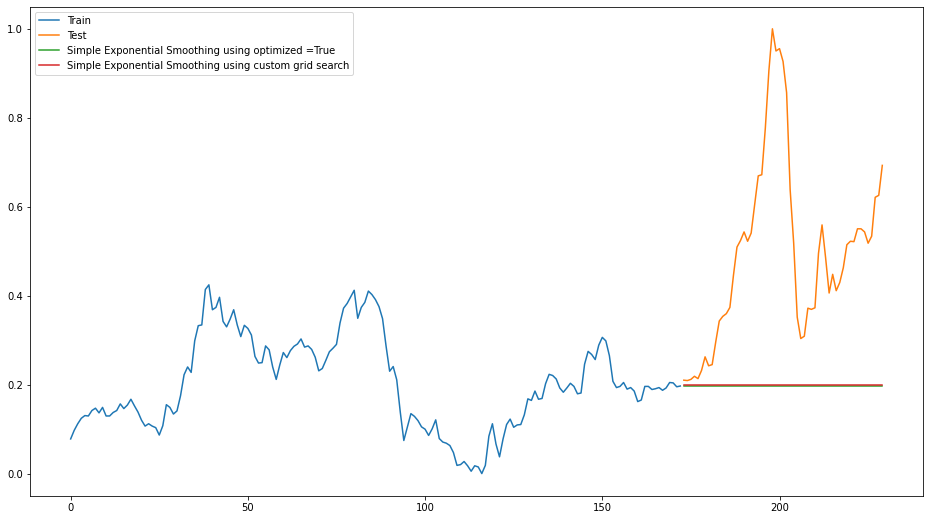

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

###Double Exponential Smoothing

In [57]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [45]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [46]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(57)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

Streaming output truncated to the last 5000 lines.
213    0.135287
214    0.133799
215    0.132310
216    0.130821
217    0.129332
218    0.127843
219    0.126355
220    0.124866
221    0.123377
222    0.121888
223    0.120400
224    0.118911
225    0.117422
226    0.115933
227    0.114444
228    0.112956
229    0.111467
dtype: float64
 RMSE is 0.4043242650720179
0.9 0.8 0.8 False
173    0.194801
174    0.193417
175    0.192034
176    0.190650
177    0.189267
178    0.187883
179    0.186500
180    0.185116
181    0.183733
182    0.182349
183    0.180966
184    0.179582
185    0.178199
186    0.176815
187    0.175432
188    0.174048
189    0.172664
190    0.171281
191    0.169897
192    0.168514
193    0.167130
194    0.165747
195    0.164363
196    0.162980
197    0.161596
198    0.160213
199    0.158829
200    0.157446
201    0.156062
202    0.154679
203    0.153295
204    0.151912
205    0.150528
206    0.149144
207    0.147761
208    0.146377
209    0.144994
210    0.143610
211    0

In [58]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
734,0.1,0.6,0.1,False,0.215233,-0.12081


In [59]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

In [60]:
Forecast_custom_pred = fit1.forecast(57)

In [61]:
fit1.summary()

Dep. Variable:,endog,No. Observations:,173
Model:,Holt,SSE,0.141
Optimized:,False,AIC,-1222.858
Trend:,Additive,BIC,-1210.245
Seasonal:,None,AICC,-1222.352
Seasonal Periods:,None,Date:,"Wed, 20 Oct 2021"
Box-Cox:,False,Time:,22:45:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_slope,0.6000000,beta,False


In [62]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 0.16010978075992244
MAE is : 0.3390347582194928
RMSE is : 0.40013720241927325
MAPE is : 60.862722817503176
R2 is : -2.873756892072693



In [63]:
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)

In [64]:
fitESAUTO.summary()

Dep. Variable:,endog,No. Observations:,173
Model:,Holt,SSE,0.109
Optimized:,True,AIC,-1266.776
Trend:,Additive,BIC,-1254.163
Seasonal:,None,AICC,-1266.270
Seasonal Periods:,None,Date:,"Wed, 20 Oct 2021"
Box-Cox:,False,Time:,22:45:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,0.000000,beta,True


In [65]:
fitESAUTOpred = fitESAUTO.forecast(57)

In [66]:
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 0.11788413438728297
MAE is : 0.27953502135858727
RMSE is : 0.3433425904068456
MAPE is : 48.70242085158865
R2 is : -1.852133554123681



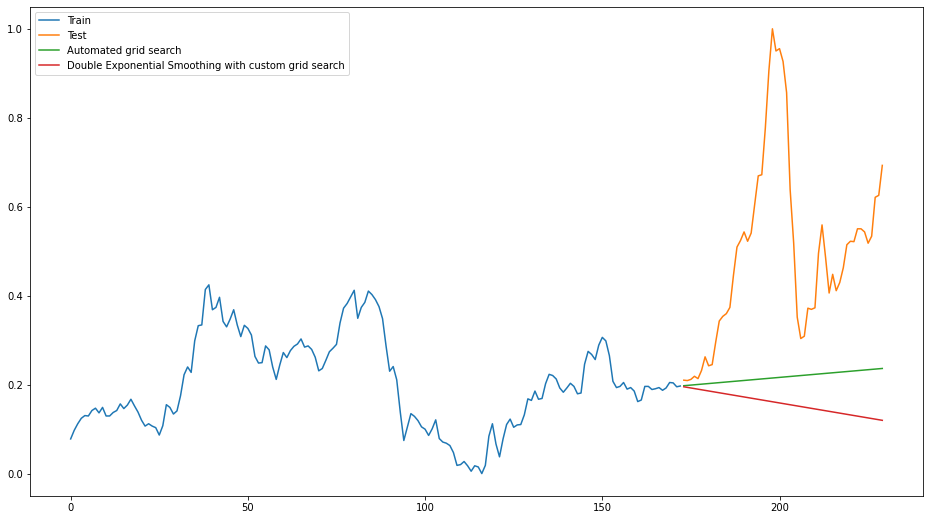

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

###Triple Exponential Smoothing

In [68]:
X = df4['cpo_pri']
test = X.iloc[-57:]
train = X.iloc[:-57]

In [69]:
X.head()

0    0.077865
1    0.097113
2    0.111986
3    0.124234
4    0.130359
Name: cpo_pri, dtype: float64

In [70]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [71]:
from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],'seasonal' :['add', 'mul'],'seasonal_periods':[3,6,12], 'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False], 'use_boxcox':[True, False],
             'remove_bias':[True, False],'use_basinhopping':[True, False]}
pg = list(ParameterGrid(param_grid))

In [72]:
df_results_moni = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                        'damping_slope','damped','use_boxcox','remove_bias','use_basinhopping','RMSE','r2'])
start = timer()
print('Starting Grid Search..')
for a,b in enumerate(pg):
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    use_basinhopping = b.get('use_basinhopping')
    #print(trend,smoothing_level, smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping)
    fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level, 
                                    smoothing_slope=smoothing_slope, damping_slope = damping_slope,use_boxcox=use_boxcox,optimized=False)
    #fit1.summary
    z = fit1.forecast(57)
    #print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    #print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'trend':trend,'seasonal_periods':seasonal_periods,'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope,
                                        'damping_slope':damping_slope,'damped':damped,'use_boxcox':use_boxcox,'use_basinhopping':use_basinhopping,'RMSE':RMSE,'r2':r2}, ignore_index=True)
print('End of Grid Search')
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

Starting Grid Search..


ValueError: ignored

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,trend,seasonal_periods,smoothing_level,smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping,RMSE,r2
70025,add,3,0.1,0.6,0.1,False,False,NaN,True,246.011299,-0.12081


In [ ]:
fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=3 ).fit(smoothing_level=0.9,
smoothing_slope=0.6, damping_slope = 0.6,use_boxcox=False,use_basinhopping = True,optimized=False)
Forecast_custom_pred = fit1.forecast(57)
fit1.summary()
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 205612.08576635754
MAE is : 383.59275861573354
RMSE is : 453.44468876187926
MAPE is : 43.008917550378726
R2 is : -2.807769728812882



In [ ]:
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

Dep. Variable:,endog,No. Observations:,173
Model:,ExponentialSmoothing,SSE,142660.000
Optimized:,True,AIC,1165.683
Trend:,None,BIC,1171.989
Seasonal:,None,AICC,1165.921
Seasonal Periods:,None,Date:,"Wed, 20 Oct 2021"
Box-Cox:,False,Time:,00:03:21
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,323.00000,l.0,True


In [ ]:
fitESAUTOpred = fitESAUTO.forecast(57)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 171262.22807017545
MAE is : 342.43859649122805
RMSE is : 413.8384081621418
MAPE is : 37.91875080700438
R2 is : -2.1716381131199225



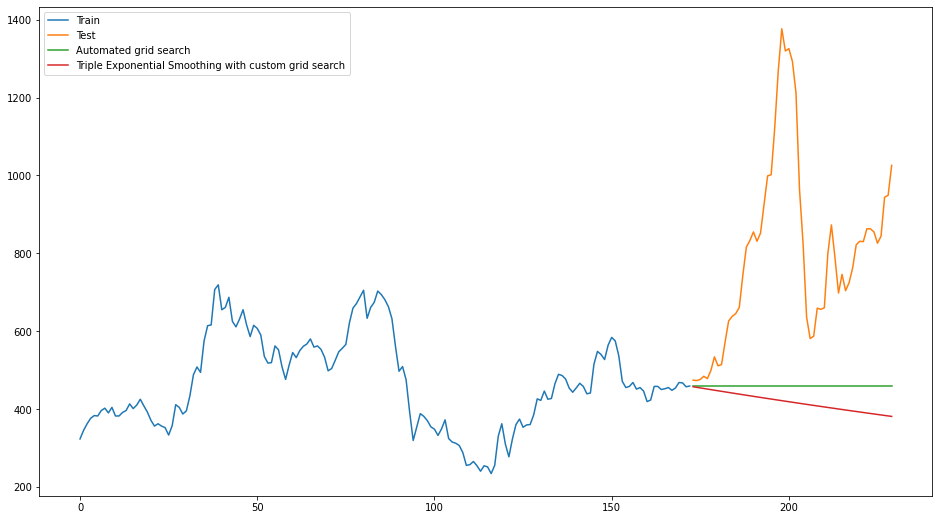

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

In [ ]:
#######VERY IMPORTANT: Predicting Weekly Hotel Cancellations with LSTM


In [ ]:
#################################SVM